## Termodinâmica de processos - Equilíbrio Líquido-Vapor (ELV)

- Sistema binário de um componente (1) e um componente (2) forma azeótropo de mínimo baseado no parâmetro $a$;


- Cálculo da faixa de pressões em que uma corrente contendo uma mistura desses componentes na composição global de $z_{1}$ = 0.15 e $z_{2}$ = 0.85 se encontra em equilíbrio líquido-vapor (ELV) para a temperatura T = 35ºC (aproximação de pressões moderadas/baixas);


- Cálculo da pressão de saturação baseada na equação de Antoine com parâmetros $A$, $B$ e $C$:

    $P^{sat}[kPa] = exp(A - \frac{B}{T[ºC] + C})$   

In [13]:
## Bibliotecas importadas 

import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

## Parâmetros operacionais

T = 35       # C
a = - 1.33   # adimensional --> Parâmetro calculado para os componentes 1 e 2  
R = 8.31     # J / mol K

## Definição da equação da pressão de saturação (Equação de Antoine)

def Psat_Antoine(A,B,C,T):
    
    # Parâmetros A,B,C vindos da equação de Antoine
    # T deve ter entrada em grau Celsius
    
    Psat =  np.exp( A - B / (T + C) )     # kPa
    Psat = 1e3 * Psat                     # A unidade de pressão está em Pa
    
    return Psat 

## Cálculo da pressão de saturação dos componentes 1 e 2

# Componente 1 --> A1 = 14.31, B1 = 2756.0, C1 = 228.1
# Componente 2 --> A2 = 15.07, B2 = 2780.0, C2 = 224.7

Psat1 = Psat_Antoine(14.31,2756,228.1,T)
print('\nA pressão de saturação do componente 1 é {:.3} kPa.\n'.format(Psat1/1e3))

Psat2 = Psat_Antoine(15.07, 2780, 224.7, T)
print('\nA pressão de saturação do componente 2 é {:.3} kPa.\n'.format(Psat2/1e3))


A pressão de saturação do componente 1 é 46.3 kPa.


A pressão de saturação do componente 2 é 78.7 kPa.



### Modelo de Margules para o cálculo do coeficiente de atividade

- A grandeza atividade é uma escala transformada do potencial químico, sendo conveniente para a descrição misturas na fase condensada;
- A definição de atividade exige a necessidade da determinação de um estado de referência pois representa uma razão entre duas fugacidades distintas (mistura real e referência); 
- Os modelos de energia livre de Gibbs em excesso baseiam-se no cálculo do coeficiente de uma espécie $i$ na solução, sendo definido pela expressão:

    $\gamma_{i} \equiv \frac{f_{mistura}}{x_{i}.f_{ideal}}$   
    
   
- A fugacidade pode ser interpretada como escala alternativa a energia de Gibbs, e consequentemente, ao potencial químico, possuindo unidade de pressão. Desse modo, a utilização da definição de fugacidade torna-se mais conveniente pois pode ser obtida diretamente a partir de relações PVT, aproximando-se do valor da pressão para um componente puro em comportamento de gás ideal;
- O cálculo da fugacidade e do coeficiente de atividade influenciam diretamente no modelo de $G^{E}$ e na descrição do afastamento da idealidade da fase líquida. O modelo de Margules representa uma possibilidade para representação da energia de Gibbs em excesso da mistura, a partir dos cálculos do coeficiente de atividade para os componentes (1) e (2): 

    $G^{E} = R.T.a.x_{1}.x_{2}$  
    
    $ln \gamma_{1} = a.x_{2}^{2}$ 

    $ln \gamma_{2} = a.x_{1}^{2}$  

In [22]:
## Definição das funções para cálculo das curvas de equilíbrio

def coef_atividade (x1,A):
    
    # Calcula os coeficientes de atividade de uma mistura binária considerando  
    # considerando modelo de G excesso de Margules
    
    x2 = 1 - x1
    gamma1 = np.exp( A * (x2**2) )
    gamma2 = np.exp( A * (x1**2) )
    
    return gamma1, gamma2


def Ponto_bolha (Psat1, Psat2, x1):
    
    # Calcula o ponto de bolha de uma mistura binária considerando a aproximação para 
    # pressões baixas/moderadas
     
    x2 = 1 - x1
    gamma1 = coef_atividade(x1,a)[0]
    gamma2 = coef_atividade(x1,a)[1]
    
    P_bolha = (Psat1 * gamma1 * x1) + (Psat2 * gamma2 * x2)
    y1 = Psat1 * gamma1 * x1 / P_bolha
     
    return y1, P_bolha


def Ponto_orvalho_ideal(Psat1,Psat2,y1):
    
    # Calcula o ponto de orvalho de uma mistura binária considerando soluções líquida 
    # e gasosa ideais em pressões baixas/moderadas
        
    y2 = 1 - y1   
    Pideal = 1 / ( y1 / Psat1 + y2 / Psat2)
    
    x1 = Psat1 * y1/ Pideal 
    x2 = Psat2 * y2 / Pideal 
    
    return Pideal, x1, x2


def P_orvalho(Psat1,Psat2,y1):
    
    # Calcula do ponto de orvalho de uma mistura binária considerando a aproximação 
    # para pressões baixas e moderadas
    
    y2 = 1 - y1 
    
    # Chute inicial considerando mistura ideal na fase líquida - Lei de Raoult 
    
    P0 = Ponto_orvalho_ideal(Psat1, Psat2, y1)[0] # Lei de Raoult  
    x1 = Ponto_orvalho_ideal(Psat1, Psat2, y1)[1]
    x2 = Ponto_orvalho_ideal(Psat1, Psat2, y1)[2]
    
    # Primeira iteração - Início do loop computacional 
    
    gamma1 = coef_atividade(x1,a)[0]
    gamma2 = coef_atividade(x1,a)[1] 
    P_novo = 1/ ( y1 / (Psat1 * gamma1) + y2 / (Psat2 * gamma2) ) # Primeira iteração 
    
    # Loop computacional - estrutura while
    
    tol = 1e-9      # tolerância do erro
    res = 1         # resíduo de cálculo
    imax = 200      # máximo de iterações 
    i = 0           # contador de iterações
       
    while res > tol and i<imax:
        
        P0 = P_novo
        x1 = (y1 * P0 / (gamma1 * Psat1) )
        gamma1 = coef_atividade(x1, a)[0]
        gamma2 = coef_atividade(x1, a)[1]              
        P_novo = 1/( y1 /( Psat1 * gamma1 ) + y2 / ( Psat2 * gamma2) )
        res = (np.abs(1 - P_novo/P0)) 
              
        i = i + 1 
                
    return P_novo

Pbolha = Ponto_bolha(Psat1,Psat2,0.15)[1]
print('\nO ponto de bolha para a composição z1 é {:.3} kPa.\n'.format(Pbolha/1e3))

Porvalho = P_orvalho(Psat1, Psat2, 0.15)
print('\nO ponto de bolha para a composição z1 é {:.3} kPa.\n'.format(Porvalho/1e3))


O ponto de bolha para a composição z1 é 67.6 kPa.


O ponto de bolha para a composição z1 é 54.4 kPa.



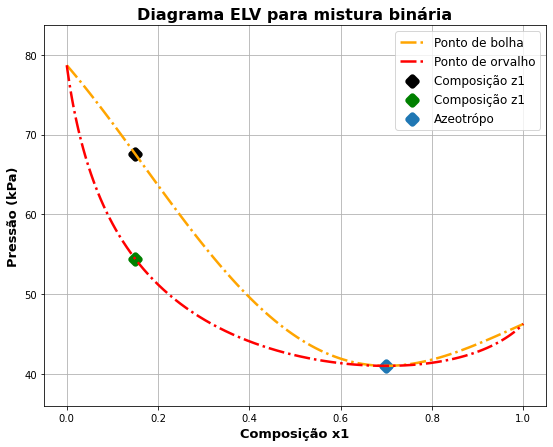

In [27]:
## Criação dos vetores de composição x1 (componente 1), pressão de bolha 
# e pressão de orvalho   

N_pontos = 100     
x1 = np.linspace(0,1,N_pontos) 
y1 = np.linspace(0,1, N_pontos) 

## Criação dos vetores de composição x1 (componente 1), pressão de bolha 
# e pressão de orvalho   
N_pontos = 100     
x1 = np.linspace(0,1,N_pontos) 
y1 = np.linspace(0,1, N_pontos) 

## Criação das listas nulas para preenchimento no loop de iterações

Equil_bolha = []
vapor = []
Equil_orvalho = []

for i in x1:

    P_bolha = Ponto_bolha(Psat1, Psat2, i)[1] 
    Equil_bolha = np.append(Equil_bolha, P_bolha)   # valores de pressão de bolha

    y_vapor = Ponto_bolha(Psat1, Psat2, i)[0]    
    vapor = np.append(vapor, y_vapor)               # valores da composição y no ELV 
     
    P_orv = P_orvalho(Psat1, Psat2, y_vapor) 
    Equil_orvalho = np.append(Equil_orvalho, P_orv) #  valores do ponto de orvalho 
  
    
## Construindo o diagrama ELV da mistura binária pela composição x1 

fig = plt.figure(figsize = (9,7)) 
plt.plot(x1, Equil_bolha / 1e3, color = 'orange', label = 'Ponto de bolha', 
         linestyle = '-.', linewidth = 2.5)
plt.plot(vapor, Equil_orvalho / 1e3, color = 'red', label = 'Ponto de orvalho', 
         linestyle = '-.', linewidth = 2.5)
plt.scatter(0.15, Pbolha / 1e3, color = 'black', marker = 'D', linewidth = 6, 
            label = 'Composição z1')
plt.scatter(0.15, Porvalho / 1e3, color = 'green', marker ='D', linewidth = 6, 
            label = 'Composição z1')
plt.scatter(0.7, Ponto_bolha(Psat1, Psat2, 0.7)[1] / 1e3, marker = 'D', linewidth = 6, 
            label = 'Azeotrópo')

## Formatação dos eixos do gráficos

plt.grid()
plt.legend(loc = 'upper right', fontsize = 12)
plt.xlabel('Composição x1', fontsize = 13, weight = 'bold')       
plt.ylabel('Pressão (kPa)',fontsize = 13, weight = 'bold')
plt.title('Diagrama ELV para mistura binária', fontsize = 16, weight = 'bold')
plt.ylim(min(Equil_orvalho) / 1e3 - 5, max(Equil_orvalho) / 1e3 + 5)
 
## Visualização do gráfico

plt.show()

Para a composição global $z_{1}$ = 0.15, a faixa de pressões em que a mistura encontra-se na faixa de ELV corresponde ao intervalo delimitado pelo ponto de bolha e orvalho. De acordo com os cálculos, os valores para os pontos de bolha e orvalho foram 67.6 e 54.4 kPa, respectivamente. Além disso, para a mistura binária dos componentes (1) e (2) ocorre a formação de um azeótropo de mínimo, o que pode ser correlacionado diretamente com o valor negativo do parâmetro adimensional $a$ do Modelo de Margules.